In [3]:
import os
import pandas as pd
import numpy as np
from IPython.display import display

from tensorflow import keras
from keras import layers, callbacks
from keras.callbacks import EarlyStopping

datapath = os.getcwd()+'/sample_data'


In [6]:
keras.__version__

'3.4.1'

## Tutorial 4: *Overfitting and Underfitting*

Use the *'red-wine'* dataset and include changes to **capacity** and **early stopping**.

In [13]:
red_wine = pd.read_csv(datapath+'/red-wine.csv')

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df_train = red_wine.sample(frac=0.70,
                           random_state=0)

df_valid = red_wine.copy().drop(df_train.index)


In [10]:
print(len(red_wine))
print()
print(len(df_train))
print()
print(len(df_valid))


1599

1119

480


In [11]:
display(df_train.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [14]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

display(df_train.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [15]:
target = 'quality'

X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_valid = df_valid.drop(target, axis=1)
y_valid = df_valid[target]


In [16]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)


In [18]:
model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape=[11]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1)
])


/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mae')


In [20]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=1)


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.3636 - val_loss: 0.1303
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1413 - val_loss: 0.1250
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1255 - val_loss: 0.1187
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1172 - val_loss: 0.1188
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1148 - val_loss: 0.1074
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1079 - val_loss: 0.1068
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1063 - val_loss: 0.1044
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1028 - val_loss: 0.1028
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1020 - val_loss: 0.1030
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0996 - val_loss: 0.1018
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0995 - val_loss: 0.1010
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0996 - val_lo

Minimum validation loss: 0.08996839076280594


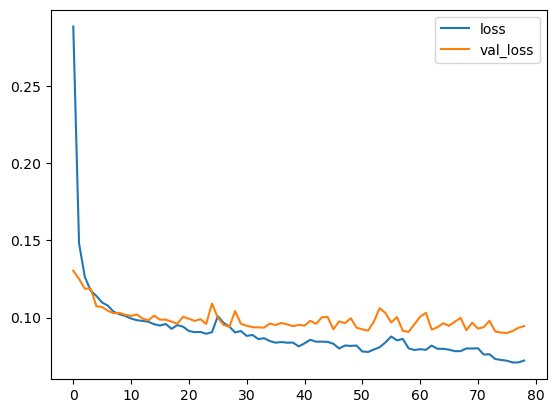

In [21]:
history_df = pd.DataFrame(history.history)

history_df.loc[:,['loss','val_loss']].plot()

print('Minimum validation loss: {}'.format(history_df.val_loss.min()))